# Promotional Marketing Campaign

# The problem

How can we increase sales? Will one of two new promotional campaigns lead to a sales increase? Testing statistically similar experimental groups (stores) over four weeks is likely to control for outside influences and account for a large window of impact.

# The potential solution

Increase sales by offering the right consumers the most effective promotion.

# The method of testing the solution

Create two new promotional campaigns ('A' and 'B') lasting four weeks each. Compare these two test samples to the control sample group ('current promotion'). These are two separate A/B tests (A/B and A/C) measuring the effect of new promotional campaigns on sales and comparing them to the current promotion. The key metric is sales.

If sales for either the 'A' or 'B' promotion increases by a significant margin within the first three weeks, then that promotion can be determined to be more successful than the current promotion. If sales remain the same or change by an insignificant margin, observe for one more week before determining success for 'A' and/or 'B'. If sales for either of these test promotions do not increase with significance after four weeks, conclude that these specific promotional campaigns do not influence sales at this time.

Success as described above will be measured among the current promotion and promotions 'A' and 'B' across all metrics associated with store data (specific market, market size, location and age) during the first three weeks and then during last week. The experiment may conclude, for example, that promotion 'A' increases sales significantly in large markets but not in small markets. Or promotion 'A' increases sales in old stores but not as much as promotion 'B'.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
PATH = 'WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv'
experiment_data = pd.read_csv(PATH)

In [3]:
experiment_data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,Week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## What do sales look like for each promotion in the *first three* weeks?

In [4]:
w1c = experiment_data[experiment_data['Week'] == 1][experiment_data['Promotion'] == 1]['SalesInThousands'].sum()
w2c = experiment_data[experiment_data['Week'] == 2][experiment_data['Promotion'] == 1]['SalesInThousands'].sum()
w3c = experiment_data[experiment_data['Week'] == 3][experiment_data['Promotion'] == 1]['SalesInThousands'].sum()
tc = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 1]['SalesInThousands'].sum()
mc = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 1]['SalesInThousands'].mean()
cc = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 1].LocationID.count()

w1a = experiment_data[experiment_data['Week'] == 1][experiment_data['Promotion'] == 2]['SalesInThousands'].sum()
w2a = experiment_data[experiment_data['Week'] == 2][experiment_data['Promotion'] == 2]['SalesInThousands'].sum()
w3a = experiment_data[experiment_data['Week'] == 3][experiment_data['Promotion'] == 2]['SalesInThousands'].sum()
ta = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 2]['SalesInThousands'].sum()
ma = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 2]['SalesInThousands'].mean()
ca = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 2].LocationID.count()

w1b = experiment_data[experiment_data['Week'] == 1][experiment_data['Promotion'] == 3]['SalesInThousands'].sum()
w2b = experiment_data[experiment_data['Week'] == 2][experiment_data['Promotion'] == 3]['SalesInThousands'].sum()
w3b = experiment_data[experiment_data['Week'] == 3][experiment_data['Promotion'] == 3]['SalesInThousands'].sum()
tb = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 3]['SalesInThousands'].sum()
mb = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 3]['SalesInThousands'].mean()
cb = experiment_data[experiment_data['Week'] != 4][experiment_data['Promotion'] == 3].LocationID.count()

/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: 

In [5]:
my_array = np.array([[w1c,w1a,w1b],
                     [w2c,w2a,w2b],
                     [w3c,w3a,w3b],
                     [tc,ta,tb],
                     [mc,ma,mb],
                     [cc,ca,cb]])

df = pd.DataFrame(
    my_array,
    columns = ['Current Promotion', 'Promotion A', 'Promotion B'],
    index = ['Week 1 Total Sales', 'Week 2 Total Sales', 'Week 3 Total Sales', 'Weeks 1 - 3 Total Sales',
             'Weeks 1 - 3 Avg. Sales Per Location', 'Location Count'])

df

,Current Promotion,Promotion A,Promotion B
Week 1 Total Sales,2504.510000,2243.320000,2621.48000
Week 2 Total Sales,2447.970000,2236.380000,2629.61000
Week 3 Total Sales,2527.320000,2242.940000,2555.76000
Weeks 1 - 3 Total Sales,7479.800000,6722.640000,7806.85000
Weeks 1 - 3 Avg. Sales Per Location,57.982946,47.678298,55.36773
Location Count,129.000000,141.000000,141.00000


It appears that for the first three weeks promotion 'B' led to slightly increased total sales generally when compared to the current promotion and yet resulted in fewer average sales per location. Promotion 'A' appears to have led to fewer sales. What does the data look like for week 4?

## What do sales look like for each promotion in the week 4?

In [6]:
w4c = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 1]['SalesInThousands'].sum()
w4cm = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 1]['SalesInThousands'].mean()
cc = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 1].LocationID.count()

w4a = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 2]['SalesInThousands'].sum()
w4am = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 2]['SalesInThousands'].mean()
ca = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 2].LocationID.count()

w4b = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 3]['SalesInThousands'].sum()
w4bm = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 3]['SalesInThousands'].mean()
cb = experiment_data[experiment_data['Week'] == 4][experiment_data['Promotion'] == 3].LocationID.count()

/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: 

In [7]:
my_array_II = np.array([[w4c,w4a,w4b],
                        [w4cm,w4am,w4bm],
                        [cc,ca,cb]])

df_II = pd.DataFrame(
    my_array_II,
    columns = ['Current Promotion', 'Promotion A', 'Promotion B'],
    index = ['Week 4 Total Sales', 'Week 4 Avg. Sales Per Location', 'Location Count'])

df_II

,Current Promotion,Promotion A,Promotion B
Week 4 Total Sales,2513.230000,2175.290000,2601.670000
Week 4 Avg. Sales Per Location,58.447209,46.282766,55.354681
Location Count,43.000000,47.000000,47.000000


The data in week 4 appears to be consistent with the previous three weeks. While promotion 'B' produced increased sales over week 4, it appears unlikely that the window of impact is playing a big role here (i.e. there is not a steady increase in sales over time for promotion 'B' making continued sales increases likely). The average sales per location for promotion 'B' also continue to be slightly fewer than the current promotion. Maybe if we slice the data by market size we will discover nuances in the success of each promotion.

## What do sales look like for each promotion in each market size after four weeks?

In [8]:
def promo_to_color(x):
    if x == 1:
        return 'white'
    if x == 2:
        return 'blue'
    if x == 3:
        return 'yellow'

experiment_data['PromoColor'] = experiment_data['Promotion'].apply(promo_to_color)

/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Othe

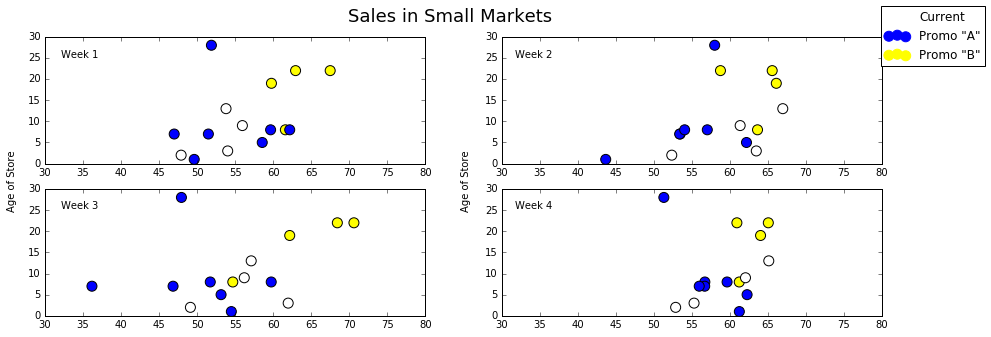

In [16]:
fig = plt.figure(figsize=(15, 5))

# Week 1

plt.subplot(221)
a = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Small']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Small']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

x = plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 85, 5))

# Week 2

plt.subplot(222)
a = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Small']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Small']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

y = plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 85, 5))

# Week 3

plt.subplot(223)
a = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Small']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Small']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

z = plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 85, 5))

# Week 4

plt.subplot(224)
a = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Small']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Small']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 85, 5))

fig.suptitle('Sales in Small Markets', size=18)

fig.text(0.14, 0.85, 'Week 1', va='center')
fig.text(0.56, 0.85, 'Week 2', va='center')
fig.text(0.14, 0.43, 'Week 3', va='center')
fig.text(0.56, 0.43, 'Week 4', va='center')

fig.text(0.09, 0.50, 'Age of Store', va='center', rotation='vertical')
fig.text(0.51, 0.50, 'Age of Store', va='center', rotation='vertical')

alist = [x,y,z]
leg = fig.legend((alist),('Current','Promo "A"','Promo "B"'),'upper right')
leg.legendHandles[0].set_color('white')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('yellow')

plt.show()

/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Othe

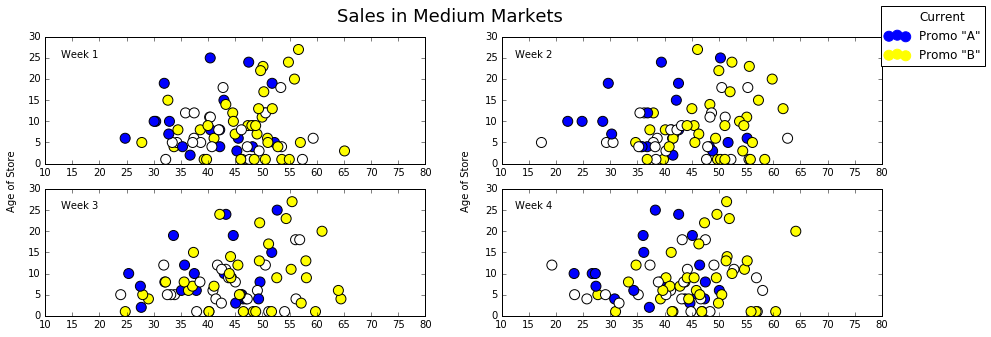

In [17]:
fig = plt.figure(figsize=(15, 5))

# Week 1

plt.subplot(221)
a = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Medium']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Medium']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(10, 85, 5))

# Week 2

plt.subplot(222)
a = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Medium']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Medium']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(10, 85, 5))

# Week 3

plt.subplot(223)
a = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Medium']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Medium']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(10, 85, 5))

# Week 4

plt.subplot(224)
a = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Medium']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Medium']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(10, 85, 5))

fig.suptitle('Sales in Medium Markets', size=18)

fig.text(0.14, 0.85, 'Week 1', va='center')
fig.text(0.56, 0.85, 'Week 2', va='center')
fig.text(0.14, 0.43, 'Week 3', va='center')
fig.text(0.56, 0.43, 'Week 4', va='center')

fig.text(0.09, 0.50, 'Age of Store', va='center', rotation='vertical')
fig.text(0.51, 0.50, 'Age of Store', va='center', rotation='vertical')

alist = [x,y,z]
leg = fig.legend((alist),('Current','Promo "A"','Promo "B"'),'upper right')
leg.legendHandles[0].set_color('white')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('yellow')

plt.show()

/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Other/Code/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/Othe

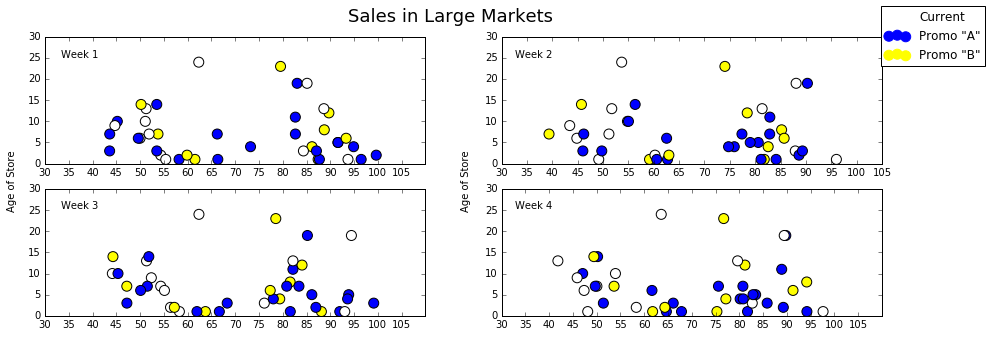

In [18]:
fig = plt.figure(figsize=(15, 5))

# Week 1

plt.subplot(221)
a = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Large']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 1][experiment_data['MarketSize'] == 'Large']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 110, 5))

# Week 2

plt.subplot(222)
a = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Large']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 2][experiment_data['MarketSize'] == 'Large']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 110, 5))

# Week 3

plt.subplot(223)
a = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Large']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 3][experiment_data['MarketSize'] == 'Large']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 110, 5))

# Week 4

plt.subplot(224)
a = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Large']['SalesInThousands'].values
b = experiment_data[experiment_data['Week'] == 4][experiment_data['MarketSize'] == 'Large']['AgeOfStore'].values
s = 100
cmap = experiment_data['PromoColor']

plt.scatter(a, b, s, cmap)
plt.ylim(0, 30)
plt.xticks(np.arange(30, 110, 5))

fig.suptitle('Sales in Large Markets', size=18)

fig.text(0.14, 0.85, 'Week 1', va='center')
fig.text(0.56, 0.85, 'Week 2', va='center')
fig.text(0.14, 0.43, 'Week 3', va='center')
fig.text(0.56, 0.43, 'Week 4', va='center')

fig.text(0.09, 0.50, 'Age of Store', va='center', rotation='vertical')
fig.text(0.51, 0.50, 'Age of Store', va='center', rotation='vertical')

alist = [x,y,z]
leg = fig.legend((alist),('Current','Promo "A"','Promo "B"'),'upper right')
leg.legendHandles[0].set_color('white')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('yellow')

plt.show()

## What are the takeaways from these data visualizations?

We can observe a few things:
+ Promotions in medium sized markets appear to need a week to really catch on and then seem to get stale in week 4
- Sales in large markets cluster around high and low levels for all promotions (likely due to variety in store size)
- The current promotion and promotion 'B' appear to have similar success rates across all market sizes

If the numbers reflect these similarities, then we will check to see if sales are significantly different for the current promotion and promotion 'B'. 

In [ ]:
csm = experiment_data[experiment_data['MarketSize'] == 'Small'][experiment_data['Promotion'] == 1]['SalesInThousands'].mean()
asm = experiment_data[experiment_data['MarketSize'] == 'Small'][experiment_data['Promotion'] == 2]['SalesInThousands'].mean()
bsm = experiment_data[experiment_data['MarketSize'] == 'Small'][experiment_data['Promotion'] == 3]['SalesInThousands'].mean()

cmm = experiment_data[experiment_data['MarketSize'] == 'Medium'][experiment_data['Promotion'] == 1]['SalesInThousands'].mean()
amm = experiment_data[experiment_data['MarketSize'] == 'Medium'][experiment_data['Promotion'] == 2]['SalesInThousands'].mean()
bmm = experiment_data[experiment_data['MarketSize'] == 'Medium'][experiment_data['Promotion'] == 3]['SalesInThousands'].mean()

clm = experiment_data[experiment_data['MarketSize'] == 'Large'][experiment_data['Promotion'] == 1]['SalesInThousands'].mean()
alm = experiment_data[experiment_data['MarketSize'] == 'Large'][experiment_data['Promotion'] == 2]['SalesInThousands'].mean()
blm = experiment_data[experiment_data['MarketSize'] == 'Large'][experiment_data['Promotion'] == 3]['SalesInThousands'].mean()

In [ ]:
my_array_III = np.array([[csm,asm,bsm],
                         [cmm,amm,bmm],
                         [clm,alm,blm]])

df_III = pd.DataFrame(
    my_array_III,
    columns = ['Current Promotion', 'Promotion A', 'Promotion B'],
    index = ['Small Markets Mean Sales', 'Medium Markets Mean Sales', 'Large Markets Mean Sales'])

df_III

## Are sales from the current promotion and promotion 'B' significantly different?

In [ ]:
p1 = plt.hist(experiment_data[experiment_data['Promotion'] == 1].SalesInThousands, normed=True, color='white', edgecolor='black', bins=20)
p2 = plt.hist(experiment_data[experiment_data['Promotion'] == 3].SalesInThousands, normed=True, color='yellow', edgecolor='black', bins=20, alpha=.3)

plt.title('Distribution of Sales for Current and "B" Promotions')
plt.xlim(0, 110)
plt.xlabel('$ Sales (in thousands)')
plt.grid(True)

plt.legend(('Current', 'B'))

plt.show()

In [ ]:
stats.ttest_ind(
    experiment_data[experiment_data['Promotion'] == 1].SalesInThousands,
    experiment_data[experiment_data['Promotion'] == 3].SalesInThousands)

## Conclusion

Within the 95% confidence interval we can dismiss the null hypothesis that these samples are significantly different. We can conclude that promotion 'B' represents the same population as the current promotion. Again, promotion 'B' does contribute to a slight increase in total sales, but a slight decrease in average sales per location.

Considering the increase in sales for promotion 'B' is so slight and there are no observable niche areas of sales differences between that and the current promotion, the decision as to which promotion to deploy will depend on outside factors. For example, if promotion 'B' is significantly more expensive to deploy, then the decision may require further discussion. If, on the other hand, costs for each promotion are the same but the marketing team requests a new promotion as a way for the company brand to remain current, then promotion 'B' should clearly be deployed.